# Project: Amazon Food Review 
### Problem Description
sentimental analysis on Amazon Food Review dataset

dataset link:https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [67]:
!python -m pip install -U gensim
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk
nltk.download('wordnet', quiet=True)
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline
def download_nltk_stopwords():
    """
    Download required NLTK stopwords corpus if it has not already been downloaded.
    """
    nltk_download_corpus('stopwords') # should be 'corpora/stop


Requirement already up-to-date: gensim in c:\users\dell\anaconda3\lib\site-packages (4.1.0)


In [36]:
df = pd.read_csv('Reviews.csv')

In [37]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
f"{df.shape[0]:,} Review"


'568,454 Review'

In [39]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


In [40]:
df_text.drop_duplicates(keep = False, inplace = True)
df_text

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
4,Great taffy at a great price. There was a wid...,5
5,I got a wild hair for taffy and ordered this f...,4
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


In [41]:
df_text['target'] = [0 if i < 3 else 1 for i in df_text['Score']]
df_text

,Text,Score,target
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
4,Great taffy at a great price. There was a wid...,5,1
5,I got a wild hair for taffy and ordered this f...,4,1
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,1
568450,I'm disappointed with the flavor. The chocolat...,2,0
568451,"These stars are small, so you can give 10-15 o...",5,1
568452,These are the BEST treats for training and rew...,5,1


<AxesSubplot:xlabel='target', ylabel='count'>

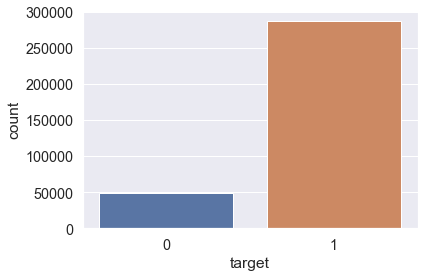

In [42]:
sns.countplot(x= df_text['target'])

In [43]:
NEG_N = df_text.target.value_counts()[0]
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_text_balanced = pd.concat([df_text.loc[df_pos.index], df_text[df_text.target == 0]])

In [44]:
df_text_balanced

,Text,Score,target
441507,I luv this product!! I searched everywhere loc...,5,1
444699,Nothing wrong with this coffee just not except...,3,1
407268,"I'm 36 weeks pregnant and craving for grape, s...",4,1
138023,I have been looking all over for this product....,5,1
146235,"Great value, happy with product , may buy agai...",5,1
...,...,...,...
568433,I just bought this soup today at my local groc...,1,0
568434,This soup is mostly broth. Although it has a k...,2,0
568435,"It is mostly broth, with the advertised 3/4 cu...",2,0
568446,I had ordered some of these a few months back ...,2,0


<AxesSubplot:xlabel='target', ylabel='count'>

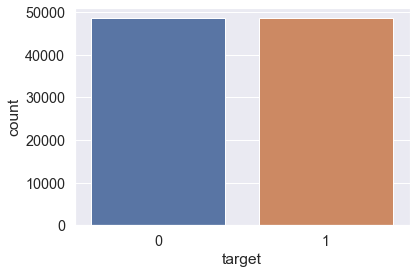

In [45]:
sns.countplot(x= df_text_balanced['target'])

In [46]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer= WordNetLemmatizer()

In [47]:
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df_text_balanced['Text'] = df_text_balanced['Text'].apply(stem_sentences)

In [48]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df_text_balanced['Text'] = df_text_balanced.Text.apply(lemmatize_text)


In [49]:
df_text_balanced['Text'] = df_text_balanced['Text'].apply(lambda x: [item for item in x if item not in stop_words])

In [50]:
df_text_balanced.head()

,Text,Score,target
441507,"[I, luv, thi, product!!, I, search, everywher,...",5,1
444699,"[noth, wrong, thi, coffe, exceptional., love, ...",3,1
407268,"[i'm, 36, week, pregnant, crave, grape,, husba...",4,1
138023,"[I, look, thi, product., It, wonder, chicken, ...",5,1
146235,"[great, value,, happi, product, ,, may, buy, a...",5,1


In [51]:
X = df_text_balanced['Text'] ## Write your code here
y = df_text_balanced['target'] ## Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(97134,)
(97134,)
(67993,)
(29141,)
(67993,)
(29141,)


In [52]:
## TFIDF embedding for the Description
#from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# fit on training (such vectorizer will be saved for deployment)
vectorizer_tfidf =  vectorizer.fit(X.apply(lambda X: ' '.join(X)))
# transform on training data
X_train = vectorizer_tfidf.transform(X_train.apply(lambda X_train: ' '.join(X_train)))
# transform on testing data
X_test = vectorizer.transform(X_test.apply(lambda X_test: ' '.join(X_test)))

In [53]:
X_train.shape, X_test.shape

((67993, 59139), (29141, 59139))

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [55]:
## initialize your Model
clf = RandomForestClassifier(n_jobs=3) 
# Fit your Model on the Training Dataset
clf.fit(X_train,y_train)
# Predict on Test data
preds = clf.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 83.36%


In [60]:
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = review
    # Embed review using tf-idf vectorizer
    embedding = vectorizer.transform([review_c])
    # Predict using your model
    prediction = model.predict(embedding)
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [62]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

In [63]:
raw_test(review_1, clf, vectorizer_tfidf)

'Positive'

In [64]:
raw_test(review_2, clf, vectorizer_tfidf)


'Negative'

In [ ]:
# model_name = 'rf_model.pk'
# vectorizer_name = 'tfidf_vectorizer.pk'

# model_path = os.path.join('..Your/Location', model_name)
# pickle.dump(clf , open(model_path, 'wb'))

# vect_path = os.path.join('..Your/Location', vectorizer_name)
# pickle.dump(vectorizer_tfidf , open(vect_path,'wb'))

In [71]:
# loaded_model = pickle.load(open(model_path,'rb'))
# loaded_vect = pickle.load(open(vect_path,'rb'))
# raw_test(review_1, loaded_model, loaded_vect)
# raw_test(review_2, loaded_model, loaded_vect)